In [1]:
import os, cv2, csv
import numpy as np
from keras.models import load_model
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
from utilities import one_hot_encoding, read_train_data, read_label_data, show_train_history
from utilities import build_vgg_model, build_resnet50_model, build_inceptionv3_model

SIZE = 1000
MODEL_FOLDER = "model/"
WIDTH = 135
HEIGHT = 35
IMG_SIZE = WIDTH if WIDTH > HEIGHT else HEIGHT
NUM_DIGIT = 6
PROCESSED_FOLDER = "processed/"
LABEL_CSV_FILE = 'label.csv'
allowedChars = '23456789abdefhknptuy';

In [2]:
model = build_vgg_model(WIDTH, HEIGHT, allowedChars, NUM_DIGIT)
# model = build_inceptionv3_model(IMG_SIZE, allowedChars, NUM_DIGIT)
# model = build_resnet50_model(WIDTH, HEIGHT, allowedChars, NUM_DIGIT)

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 35, 135, 3)] 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 35, 135, 32)  896         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 35, 135, 32)  9248        conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 17, 67, 32)   0           conv2d_1[0][0]                   
_______________________________________________________________________________________

In [3]:
print("Reading training data...")

train_data = read_train_data(PROCESSED_FOLDER, SIZE)
train_label = read_label_data(LABEL_CSV_FILE, allowedChars, NUM_DIGIT, SIZE)

print("Reading completed")

Reading training data...
Reading completed


In [4]:
filepath = MODEL_FOLDER + "{epoch:02d}-{loss:.2f}-{val_loss:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_digit4_accuracy', verbose=1, save_best_only=True, mode='max')
earlystop = EarlyStopping(monitor='val_loss', patience=8, verbose=1, mode='auto')
tensorBoard = TensorBoard(log_dir = 'logs', histogram_freq = 1)
callbacks_list = [tensorBoard, earlystop, checkpoint]

In [5]:
# model = load_model("vaccine1922_model.hdf5")

In [6]:
history = model.fit(train_data, train_label, validation_split=0.2, batch_size=20, epochs=100, verbose=1, shuffle=True, callbacks=callbacks_list)

Epoch 1/100
 1/40 [..............................] - ETA: 0s - loss: 34.1184 - digit1_loss: 5.6500 - digit2_loss: 6.5713 - digit3_loss: 5.3840 - digit4_loss: 4.9444 - digit5_loss: 6.1121 - digit6_loss: 5.4566 - digit1_accuracy: 0.0500 - digit2_accuracy: 0.0000e+00 - digit3_accuracy: 0.1000 - digit4_accuracy: 0.0500 - digit5_accuracy: 0.0000e+00 - digit6_accuracy: 0.0500WARNING:tensorflow:From /Users/maxmilian/miniconda3/lib/python3.8/site-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
40/40 [==============================] - ETA: 0s - loss: 26.1522 - digit1_loss: 4.2896 - digit2_loss: 4.3657 - digit3_loss: 4.4563 - digit4_loss: 4.2693 - digit5_loss: 4.4567 - digit6_loss: 4.3146 - digit1_accuracy: 0.0538 - digit2_accuracy: 0.0587 - digit3_accuracy: 0.0587 - digit4_accuracy: 0.0600 - digit5_accuracy: 0.0512 - digi

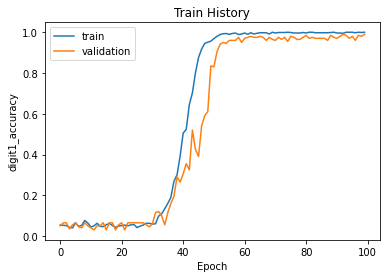

In [7]:
show_train_history(history, 'digit1_accuracy', 'val_digit1_accuracy')